<a href="https://colab.research.google.com/github/DjDc31/DjDc31/blob/main/Final_ProjectWagonB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import

In [ ]:
!pip install git+https://github.com/PyFstat/PyFstat@python37


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PyFstat/PyFstat (to revision python37) to /tmp/pip-req-build-ogcn9_kq
  Running command git clone -q https://github.com/PyFstat/PyFstat /tmp/pip-req-build-ogcn9_kq
  Running command git checkout -b python37 --track origin/python37
  Switched to a new branch 'python37'
  Branch 'python37' set up to track remote branch 'python37' from 'origin'.


In [ ]:
import os
import h5py
import gc
import glob
import math
import random
import warnings
#import pyfstat
import librosa
import librosa.display
import numpy as np
import pandas as pd
import seaborn as sns
#import visualkeras
#import riroriro.inspiralfuns as ins
#import riroriro.mergerfirstfuns as me1
#import riroriro.matchingfuns as mat
#import riroriro.mergersecondfuns as me2
import tensorflow as tf
from scipy.signal import istft
from tensorflow.keras import regularizers
from tensorflow.keras import layers
#import tensorflow_addons as tfa

from pathlib import Path
from scipy import stats
from tqdm.notebook import tqdm
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from tensorflow.keras.utils import plot_model
from sklearn.model_selection   import train_test_split
from tqdm.notebook import tqdm
import pyfstat
from pyfstat.utils.sft import get_sft_as_arrays
logger = pyfstat.set_up_logger(label="1_generating_signals", log_level="INFO")

%matplotlib inline

## Data take

In [ ]:
di = '/content/drive/MyDrive/gravit_waves/'
df = pd.read_csv(di + 'train_labels.csv')
#df = df[df.target >= 0]  # Remove 3 eggs (target = -1)

In [ ]:
df.keys()

Index(['id', 'target'], dtype='object')

In [ ]:
df

,id,target
0,001121a05,1
1,004f23b2d,1
2,00a6db666,1
3,00f36a6ac,1
4,010a387db,1
...,...,...
598,fe38dbe64,1
599,feafd0d16,1
600,feeca844e,1
601,ff5ad023f,1


In [ ]:
DATA_PATH = Path('/content/drive/MyDrive/gravit_waves/')
TRAIN_PATH = DATA_PATH/'train'
TEST_PATH = DATA_PATH/'test'

In [ ]:
print("Train Size:")
print(len(os.listdir(TRAIN_PATH)))
print("Test Size:")
len(os.listdir(TEST_PATH))

Train Size:
603
Test Size:


7975

## Analyse de la DATA

Mistake Y

In [ ]:
df['target'].value_counts()

 1    400
 0    200
-1      3
Name: target, dtype: int64

In [ ]:
df['target'][28]

1

In [ ]:
df.sort_values(by = 'target')

,id,target
197,50f09e37e,-1
230,62b0dd011,-1
437,b7666b451,-1
440,b8a6f8533,0
466,c5866e605,0
...,...,...
231,63516d7d8,1
229,62a276084,1
228,624188624,1
226,61669dba8,1


Easter-Egg

In [ ]:
filename = "/content/drive/MyDrive/gravit_waves/train/50f09e37e.hdf5"
filename2 = "/content/drive/MyDrive/gravit_waves/train/62b0dd011.hdf5"
filename3 = "/content/drive/MyDrive/gravit_waves/train/b7666b451.hdf5"

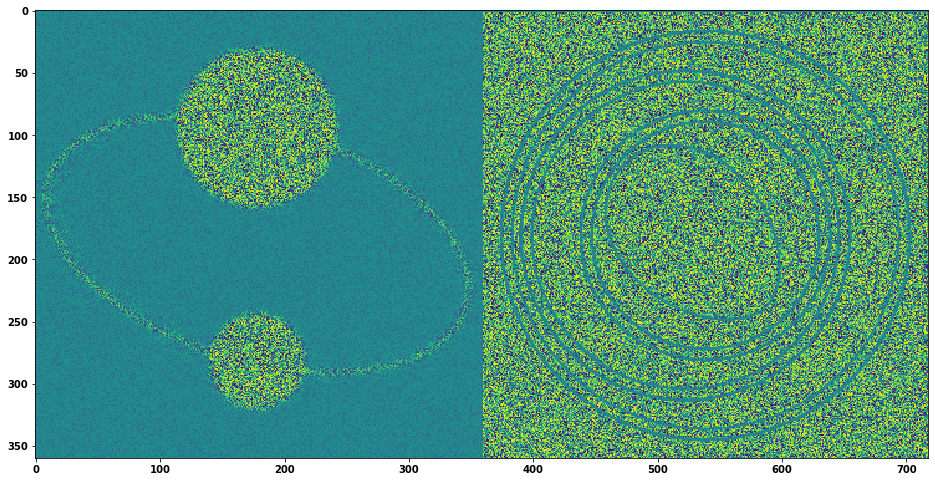

In [ ]:
with h5py.File(filename, "r") as f:
  #print(f['b7666b451'].keys())
  
  frequency = np.array(f['50f09e37e']["frequency_Hz"])
  data_H1 = np.array(f['50f09e37e']["H1"]["SFTs"])
  time_H1 = np.array(f['50f09e37e']["H1"]["timestamps_GPS"])

  data_L1 = np.array(f['50f09e37e']["L1"]["SFTs"])
  time_L1 = np.array(f['50f09e37e']["L1"]["timestamps_GPS"])

  H = np.absolute(data_H1) + np.absolute(data_L1)

  f = plt.figure()
  f.set_figwidth(16)
  f.set_figheight(20)

  plt.imshow(H, interpolation='none')
  plt.show()

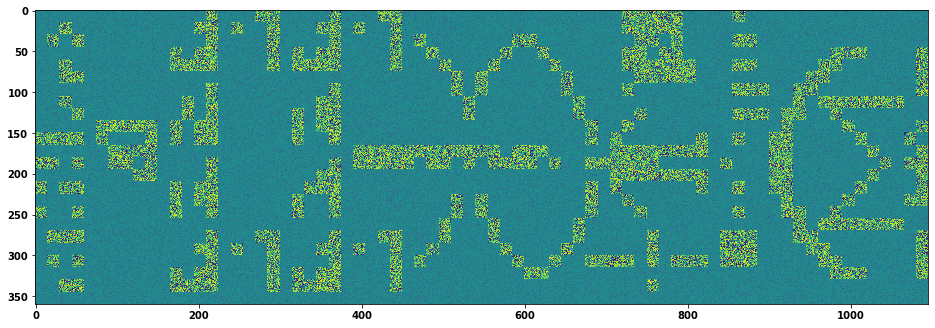

In [ ]:
with h5py.File(filename2, "r") as f:
  #print(f['b7666b451'].keys())
  frequency = np.array(f['62b0dd011']["frequency_Hz"])
  data_H1 = np.array(f['62b0dd011']["H1"]["SFTs"])
  time_H1 = np.array(f['62b0dd011']["H1"]["timestamps_GPS"])

  data_L1 = np.array(f['62b0dd011']["L1"]["SFTs"])
  time_L1 = np.array(f['62b0dd011']["L1"]["timestamps_GPS"])

  H = np.absolute(data_H1) + np.absolute(data_L1)

  f = plt.figure()
  f.set_figwidth(16)
  f.set_figheight(20)

  plt.imshow(H, interpolation='none')
  plt.show()

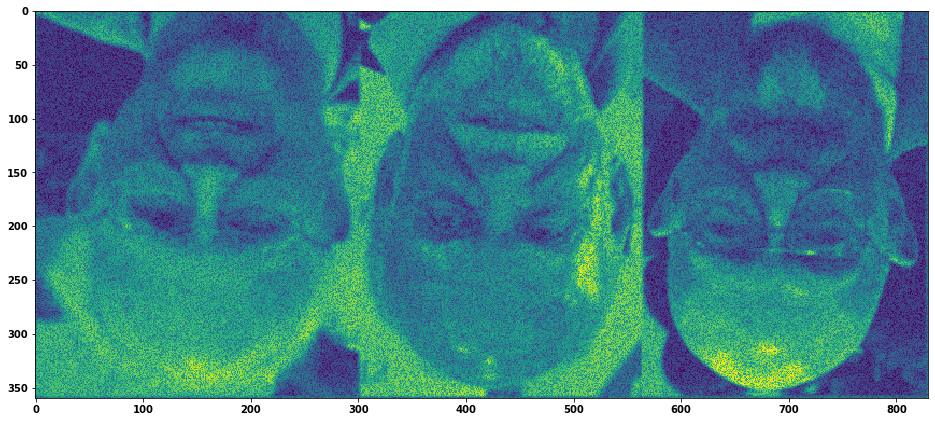

In [ ]:
with h5py.File(filename3, "r") as f:
  #print(f['b7666b451'].keys())
  
  frequency = np.array(f['b7666b451']["frequency_Hz"])
  data_H1 = np.array(f['b7666b451']["H1"]["SFTs"])
  time_H1 = np.array(f['b7666b451']["H1"]["timestamps_GPS"])

  data_L1 = np.array(f['b7666b451']["L1"]["SFTs"])
  time_L1 = np.array(f['b7666b451']["L1"]["timestamps_GPS"])

  H = np.absolute(data_H1) + np.absolute(data_L1)

  f = plt.figure()
  f.set_figwidth(16)
  f.set_figheight(20)

  plt.imshow(H, interpolation='none')
  plt.show()

## delete data easter egg

In [ ]:
df = df[df.target >= 0]  # Remove 3 eggs (target = -1)

## Analyse du spectre

In [ ]:
! pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import h5py
import timm
import torch
import torch.nn as nn

from tqdm.auto import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from timm.scheduler import CosineLRScheduler

In [ ]:
class Dataset(torch.utils.data.Dataset):
    """
    dataset = Dataset(data_type, df)

    img, y = dataset[i]
      img (np.float32): 2 x 360 x 128
      y (np.float32): label 0 or 1
    """
    def __init__(self, data_type, df):
        self.data_type = data_type
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        """
        i (int): get ith data
        """
        r = self.df.iloc[i]
        y = np.float32(r.target)
        file_id = r.id

        img = np.empty((2, 360, 128), dtype=np.float32)

        filename = '%s/%s/%s.hdf5' % (di, self.data_type, file_id)
        with h5py.File(filename, 'r') as f:
            g = f[file_id]

            for ch, s in enumerate(['H1', 'L1']):
                a = g[s]['SFTs'][:, :4096] * 1e22  # Fourier coefficient complex64

                p = a.real**2 + a.imag**2  # power
                p /= np.mean(p)  # normalize
                p = np.mean(p.reshape(360, 128, 32), axis=2)  # compress 4096 -> 128

                img[ch] = p

        return img, y

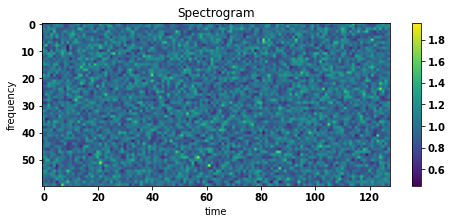

In [ ]:
dataset = Dataset('train', df)
img, y = dataset[19]

plt.figure(figsize=(8, 3))
plt.title('Spectrogram')
plt.xlabel('time')
plt.ylabel('frequency')
plt.imshow(img[1, 300:360])  # zooming
plt.colorbar()
plt.show()

In [ ]:
##ajout de la data supp

#signal = []
#for i in tqdm(range(1,100 )):
#    di = f'/content/drive/MyDrive/gravit_waves/train/Generated_train_with_CW/Signal_with_CW_{i}/'
#    freq_hz, h1_timestamp, h1_stft = pyfstat.utils.get_sft_as_arrays(di + f'H-5760_H1_1800SFT_Signal_with_CW_{i}-1238166018-10368000.sft')
#    freq_hz, l1_timestamp, l1_stft = pyfstat.utils.get_sft_as_arrays(di + f'L-5760_L1_1800SFT_Signal_with_CW_{i}-1238166018-10368000.sft')
#    signal.append(([h1_stft, h1_timestamp],            [l1_stft, l1_timestamp], np.array(freq_hz)))

##Assemblage des données crées

In [ ]:
df

,id,target
0,001121a05,1
1,004f23b2d,1
2,00a6db666,1
3,00f36a6ac,1
4,010a387db,1
...,...,...
598,fe38dbe64,1
599,feafd0d16,1
600,feeca844e,1
601,ff5ad023f,1


In [ ]:
#import csv
#with open('/content/drive/MyDrive/gravit_waves/Train_data_without_CW.csv') as csvfile:
#    reader = csv.DictReader(csvfile, skipinitialspace=True)
#    for row in reader:
#        row['Signal_without_CW']=[[h1_stft, h1_timestamp],[l1_stft, l1_timestamp],freq_hz]
#        print(row['Signal_without_CW'][1])

## Analyse spectre

In [ ]:
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from scipy import stats
import os

In [ ]:
def plot_amplitude_spectrogram(timestamps, frequency, fourier_data):
    
    ax = plt.subplot(1, 2, 1)
    ax.set(xlabel="SFT index", ylabel="Frequency [Hz]")
    time_in_days = (timestamps - timestamps[0]) / 3600 / 24
    ax.set_title("SFT amplitude")
    c = ax.pcolorfast(
        time_in_days, frequency, np.absolute(fourier_data)[:-1, :-1], norm=colors.Normalize()
    )
    
    ax = plt.subplot(1, 2, 2)
    
    noise_levels = np.std(np.absolute(fourier_data).astype(np.float64), axis=0)
    
    ax.plot(noise_levels)
    ax.set_title('SFT Amplitude STDDEV')

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

In [ ]:
"""for i, (_, r) in enumerate(df_stat_test.query('stddiff < 1e-24').head(4).iterrows()):
    (h1_sfts, h1_ts), (l1_sfts, l1_ts), freq = read_data_c(r.fname)
    plt.figure(figsize=(15, 7))
    plt.suptitle(f'Competition test sample: {os.path.basename(r.fname)}')
    plot_amplitude_spectrogram(
        h1_ts, np.array(freq), h1_sfts
    )
"""

"for i, (_, r) in enumerate(df_stat_test.query('stddiff < 1e-24').head(4).iterrows()):\n    (h1_sfts, h1_ts), (l1_sfts, l1_ts), freq = read_data_c(r.fname)\n    plt.figure(figsize=(15, 7))\n    plt.suptitle(f'Competition test sample: {os.path.basename(r.fname)}')\n    plot_amplitude_spectrogram(\n        h1_ts, np.array(freq), h1_sfts\n    )\n"

## Model


In [ ]:
class Model(nn.Module):
    def __init__(self, name, *, pretrained=False):
        """
        name (str): timm model name, e.g. tf_efficientnet_b2_ns
        """
        super().__init__()

        # Use timm
        model = timm.create_model(name, pretrained=pretrained, in_chans=2)

        clsf = model.default_cfg['classifier']
        n_features = model._modules[clsf].in_features
        model._modules[clsf] = nn.Identity()

        self.fc = nn.Linear(n_features, 1)
        self.model = model

    def forward(self, x):
        x = self.model(x)
        x = self.fc(x)
        return x

## Predict & Eval

In [ ]:
def evaluate(model, loader_val, *, compute_score=True, pbar=None):
    """
    Predict and compute loss and score
    """
    tb = time.time()
    was_training = model.training
    model.eval()

    loss_sum = 0.0
    n_sum = 0
    y_all = []
    y_pred_all = []

    if pbar is not None:
        pbar = tqdm(desc='Predict', nrows=78, total=pbar)

    for img, y in loader_val:
        n = y.size(0)
        img = img.to(device)
        y = y.to(device)

        with torch.no_grad():
            y_pred = model(img.to(device))
        loss = criterion(y_pred.view(-1), y)

        n_sum += n
        loss_sum += n * loss.item()

        y_all.append(y.cpu().detach().numpy())
        y_pred_all.append(y_pred.sigmoid().squeeze().cpu().detach().numpy())

        if pbar is not None:
            pbar.update(len(img))
        
        del loss, y_pred, img, y

    loss_val = loss_sum / n_sum

    y = np.concatenate(y_all)
    y_pred = np.concatenate(y_pred_all)

    score = roc_auc_score(y, y_pred) if compute_score else None

    ret = {'loss': loss_val,
           'score': score,
           'y': y,
           'y_pred': y_pred,
           'time': time.time() - tb}
    
    model.train(was_training)  # back to train from eval if necessary

    return ret

## Train

In [ ]:
df

,id,target
0,001121a05,1
1,004f23b2d,1
2,00a6db666,1
3,00f36a6ac,1
4,010a387db,1
...,...,...
598,fe38dbe64,1
599,feafd0d16,1
600,feeca844e,1
601,ff5ad023f,1


In [ ]:
device = torch.device('cuda')
criterion = nn.BCEWithLogitsLoss()

In [ ]:
model_name = 'tf_efficientnet_b2_ns'
nfold = 5
kfold = KFold(n_splits=nfold, random_state=42, shuffle=True)

epochs = 2
batch_size = 64
num_workers = 2
weight_decay = 1e-6
max_grad_norm = 1000

lr_max = 4e-4
epochs_warmup = 1.0

for ifold, (idx_train, idx_test) in enumerate(kfold.split(df)):
    print('Fold %d/%d' % (ifold, nfold))
    torch.manual_seed(42 + ifold + 1)

    # Train - val split
    dataset_train = Dataset('train', df.iloc[idx_train])
    dataset_val = Dataset('train', df.iloc[idx_test])

    loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size,
                     num_workers=num_workers, pin_memory=True, shuffle=True, drop_last=True)
    loader_val = torch.utils.data.DataLoader(dataset_val, batch_size=batch_size,
                     num_workers=num_workers, pin_memory=True)

    # Model and optimizer
    model = Model(model_name, pretrained=True)
    model.to(device)
    model.train()

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr_max, weight_decay=weight_decay)

    # Learning-rate schedule
    nbatch = len(loader_train)
    warmup = epochs_warmup * nbatch  # number of warmup steps
    nsteps = epochs * nbatch        # number of total steps

    scheduler = CosineLRScheduler(optimizer,
                  warmup_t=warmup, warmup_lr_init=0.0, warmup_prefix=True, # 1 epoch of warmup
                  t_initial=(nsteps - warmup), lr_min=1e-6)                # 3 epochs of cosine
    
    time_val = 0.0
    lrs = []

    tb = time.time()
    print('Epoch   loss          score   lr')
    for iepoch in range(epochs):
        loss_sum = 0.0
        n_sum = 0

        # Train
        for ibatch, (img, y) in enumerate(loader_train):
            n = y.size(0)
            img = img.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            y_pred = model(img)
            loss = criterion(y_pred.view(-1), y)

            loss_train = loss.item()
            loss_sum += n * loss_train
            n_sum += n

            loss.backward()

            grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),
                                                       max_grad_norm)
            optimizer.step()
            
            scheduler.step(iepoch * nbatch + ibatch + 1)
            lrs.append(optimizer.param_groups[0]['lr'])            

        # Evaluate
        val = evaluate(model, loader_val)
        time_val += val['time']
        loss_train = loss_sum / n_sum
        lr_now = optimizer.param_groups[0]['lr']
        dt = (time.time() - tb) / 60
        print('Epoch %d %.4f %.4f %.4f  %.2e  %.2f min' %
              (iepoch + 1, loss_train, val['loss'], val['score'], lr_now, dt))

    dt = time.time() - tb
    print('Training done %.2f min total, %.2f min val' % (dt / 60, time_val / 60))

    # Save model
    ofilename = 'model%d.pytorch' % ifold
    torch.save(model.state_dict(), ofilename)
    print(ofilename, 'written')

    break  # 1 fold only

In [ ]:
df

,id,target
0,001121a05,1
1,004f23b2d,1
2,00a6db666,1
3,00f36a6ac,1
4,010a387db,1
...,...,...
598,fe38dbe64,1
599,feafd0d16,1
600,feeca844e,1
601,ff5ad023f,1


In [ ]:
di = '/content/drive/MyDrive/gravit_waves'
df = pd.read_csv(di + '/_labels2.csv')

In [ ]:
model_name = 'tf_efficientnet_b2_ns'
nfold = 5
kfold = KFold(n_splits=nfold, random_state=42, shuffle=True)

epochs = 4
batch_size = 32
num_workers = 2
weight_decay = 1e-6
max_grad_norm = 1000

lr_max = 4e-4
epochs_warmup = 1.0

for ifold, (idx_train, idx_test) in enumerate(kfold.split(df)):
    print('Fold %d/%d' % (ifold, nfold))
    torch.manual_seed(42 + ifold + 1)

    # Train - val split
    dataset_train = Dataset('train2/Generated_train', df.iloc[idx_train])
    dataset_val = Dataset('train2/Generated_train', df.iloc[idx_test])

    loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size,
                     num_workers=num_workers, pin_memory=True, shuffle=True, drop_last=True)
    loader_val = torch.utils.data.DataLoader(dataset_val, batch_size=batch_size,
                     num_workers=num_workers, pin_memory=True)

    # Model and optimizer
    model = Model(model_name, pretrained=True)
    model.to(device)
    model.train()

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr_max, weight_decay=weight_decay)

    # Learning-rate schedule
    nbatch = len(loader_train)
    warmup = epochs_warmup * nbatch  # number of warmup steps
    nsteps = epochs * nbatch        # number of total steps

    scheduler = CosineLRScheduler(optimizer,
                  warmup_t=warmup, warmup_lr_init=0.0, warmup_prefix=True, # 1 epoch of warmup
                  t_initial=(nsteps - warmup), lr_min=1e-6)                # 3 epochs of cosine
    
    time_val = 0.0
    lrs = []

    tb = time.time()
    print('Epoch   loss          score   lr')
    for iepoch in range(epochs):
        loss_sum = 0.0
        n_sum = 0

        # Train
        for ibatch, (img, y) in enumerate(loader_train):
            n = y.size(0)
            img = img.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            y_pred = model(img)
            loss = criterion(y_pred.view(-1), y)

            loss_train = loss.item()
            loss_sum += n * loss_train
            n_sum += n

            loss.backward()

            grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(),
                                                       max_grad_norm)
            optimizer.step()
            
            scheduler.step(iepoch * nbatch + ibatch + 1)
            lrs.append(optimizer.param_groups[0]['lr'])            

        # Evaluate
        val = evaluate(model, loader_val)
        time_val += val['time']
        loss_train = loss_sum / n_sum
        lr_now = optimizer.param_groups[0]['lr']
        dt = (time.time() - tb) / 60
        print('Epoch %d %.4f %.4f %.4f  %.2e  %.2f min' %
              (iepoch + 1, loss_train, val['loss'], val['score'], lr_now, dt))

    dt = time.time() - tb
    print('Training done %.2f min total, %.2f min val' % (dt / 60, time_val / 60))

    # Save model
    ofilename = 'model2%d.pytorch' % ifold
    torch.save(model.state_dict(), ofilename)
    print(ofilename, 'written')

    break  # 1 fold only

Fold 0/5
Epoch   loss          score   lr


ValueError: ignored

## Extraction de la donnée / Test 

In [ ]:
# Load model (if necessary)
model = Model(model_name, pretrained=False)
filename = 'model0.pytorch'
model.to(device)
model.load_state_dict(torch.load(filename, map_location=device))
model.eval()

# Predict
submit = pd.read_csv(di + '/sample_submission.csv')
dataset_test = Dataset('test', submit)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=64,
                                          num_workers=num_workers, pin_memory=True)

test = evaluate(model, loader_test, compute_score=False, pbar=len(submit))
print(test)
# Write prediction
submit['target'] = test['y_pred']
submit.to_csv('submission2.csv', index=False)

In [ ]:
#submit.to_csv('submission2.csv', index=False)

In [ ]:
#result = pd.DataFrame.from_dict({"id": fid, "target": infer})
#result.to_csv("submission.csv", index=False)